In [1]:
import matplotlib.pyplot as plt
import matplotlib as mal
plt.rc('font',family='Malgun Gothic') # 폰트 선택ㅇ
plt.rc('font',size=11) #폰트크기 11
plt.rc('axes',unicode_minus=False) #한글 깨짐 방지
import pandas as pd


In [2]:
df=pd.read_csv('data/score.csv')
df['학년'] = [3, 3, 2, 1, 1, 3, 2, 2]

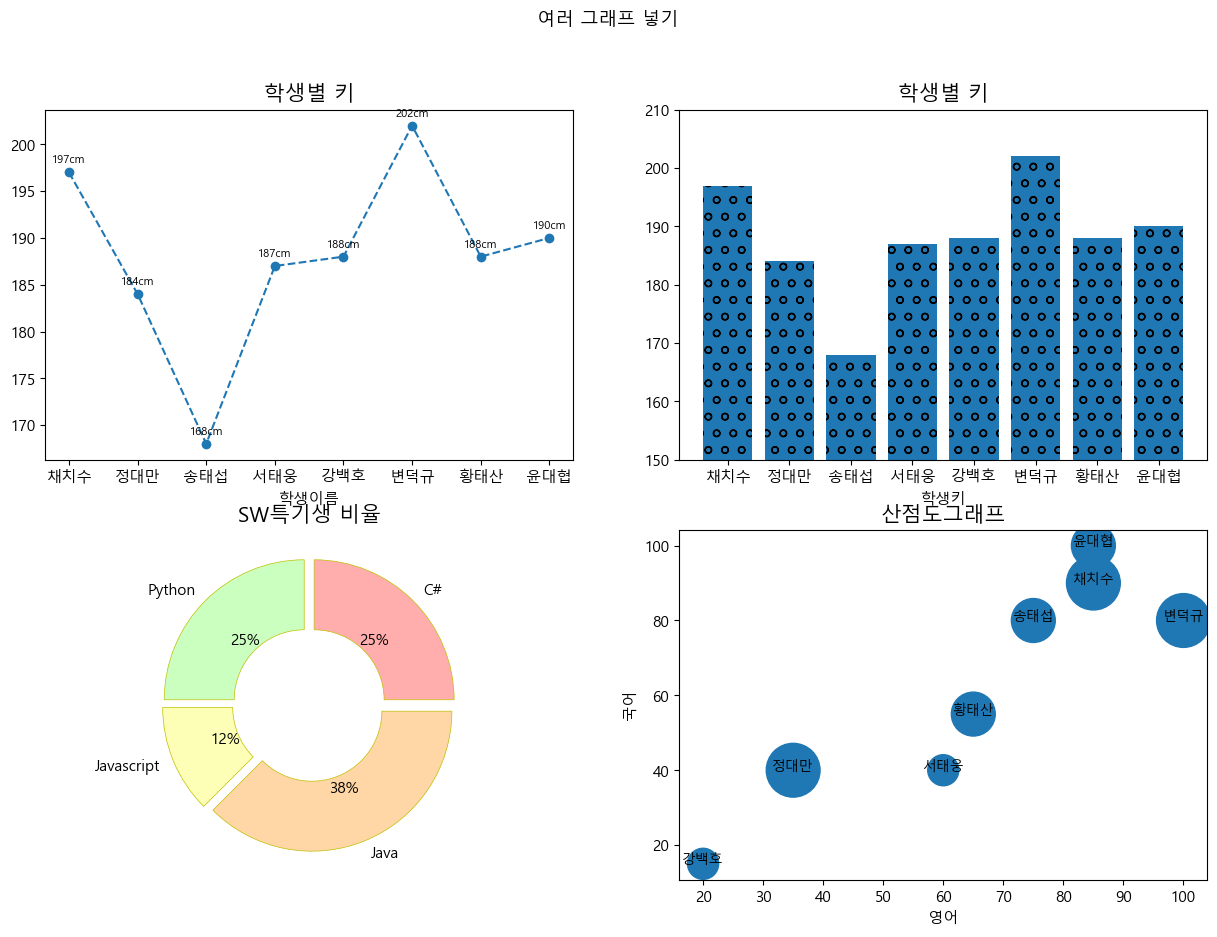

In [3]:

#1번 그래프
fig,axs=plt.subplots(2,2,figsize=(15,10)) #여러 그래프 개수 설정(2,2)는 x축 2개, y축 2개에 크기는 15,10
fig.suptitle('여러 그래프 넣기')
axs1=axs[0,0]
axs1.plot(df['이름'],df['키'],marker='o',ls='--')
axs1.set_title('학생별 키', size=15)
axs1.set_xlabel('학생이름')
for idx in range(len(df)): #x 가 행 y가 idx의 열
    x=idx
    y=df.loc[idx,'키']
    txt=f'{y}cm'
    axs1.text(x,y+1,txt,size=8,ha='center')


#2번 그래프
axs2=axs[0,1]
axs2.set_title('학생별 키',size=15)
axs2.bar(df['이름'],df['키'],hatch='o')
axs2.set_xlabel('학생키')
axs2.set_ylim(150,210)

#3번 그래프
axs3=axs[1,0]
group=df.groupby('SW특기').size()
axs3.set_title('SW특기생 비율', size=15)
axs3.pie(group.values,labels=group.index, 
        autopct='%.0f%%', startangle= 90, counterclock=False,
        explode=[0.05]*len(group.values),  # explode=[간격]*len(쪼갤 조각 수) 파이 조각을 나눠놓음]
        wedgeprops={'width':0.5, 'edgecolor':'y', 'linewidth':0.5}, # wedgeprops는 도넛형태로 변경함을 의미(중괄호) width는 너비, edgecolor는 테두리 선색, linewith는 선 두께를 의미
         colors = ['#FFADAD','#FFD6A5','#FDFFB6','#CAFFBF','#9BF6FF','#A0C4FF']) 

#4번 그래프
axs4=axs[1,1]
axs4.set_title('산점도그래프',size=15)
axs4.scatter(df['영어'],df['국어'], sizes=df['학년']*500)
axs4.set_xlabel('영어')
axs4.set_ylabel('국어')
for idx in range(len(df)):
    y=df.loc[idx, '국어']
    x=df.loc[idx,'영어']
    text=df.loc[idx, '이름']
    plt.text(x,y,text,ha='center',size=10)
plt.show()


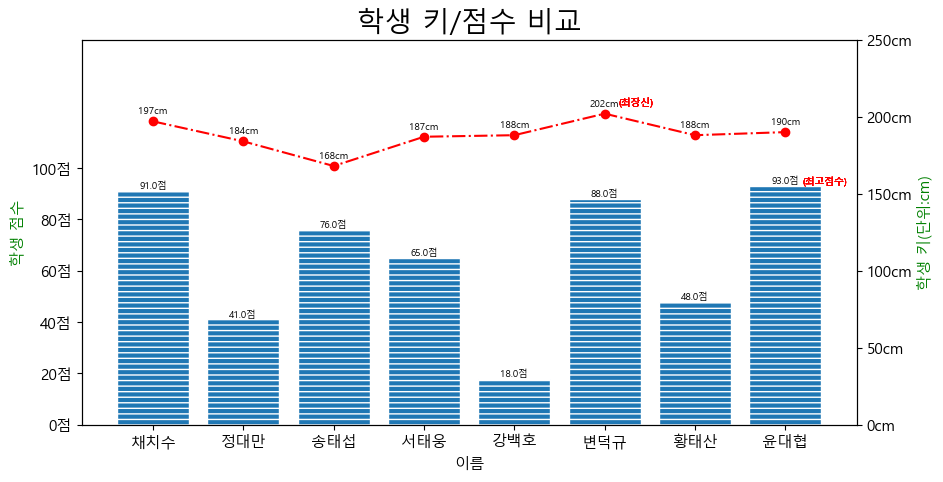

In [97]:
# 평균 구하기
df=pd.read_csv('data/score.csv')
df['평균']=df.apply(lambda row:row['국어':'사회'].mean(),axis=1)#익명의 한줄 함수 lambda
df

# 그래프 구하기 한쪽은 평균/ 한쪽은 키를 가지고 옴(1번. ylim 정하기)
fig, ax=plt.subplots(figsize=(10,5))#fig는 도화지, ax는 도화지 내 그래프를 의미한다고 생각하기
ax.bar(df['이름'],df['평균'], hatch='---', edgecolor='white')
yticks=[y for y in range(0,101,20)] # yticks는 100점까지 20점마다 상승하는 y축 단위
ax.set_yticks(yticks,[f'{y}점' for y in yticks]) # 형식 '점'을 넣기 위해 yticks를 변수 지정/ 형식 넣을 때 [] 넣어줌
ax.set_ylim(0,150)
ax.set_ylabel('학생 점수', color='green')
ax.set_xlabel('이름')
for idx,d in enumerate(df['평균']):
    plt.text(idx,df['평균'][idx]+1,f'{d}점',ha='center',size=7)
    plt.text(7+0.19,df['평균'][7]+1,'(최고점수)',ha='left',size=7,color='red')


ax2=ax.twinx()
ax2.plot(df['이름'],df['키'], marker='o',color='red', ls='-.')
yticks=[y for y in range(0, 251, 50)]
ax2.set_yticks(yticks,[f'{y}cm' for y in yticks])
ax2.set_ylim(0,250)
ax2.set_ylabel('학생 키(단위:cm)', color='green')
for idx,d in enumerate(df['키']):
    plt.text(idx,df['키'][idx]+5,f'{d}cm',ha='center',size=7)
    plt.text(5+0.35,df['키'][5]+5,'(최장신)',ha='center',size=7,color='red')
plt.title('학생 키/점수 비교',size=20)
plt.savefig('학생별 점수와 키 비교.png')